In [1]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import camb
from camb import model, initialpower
import math
from scipy.integrate import simps as simps
from scipy.integrate import quad as quad

In [2]:
pars = camb.CAMBparams()
pars.set_cosmology(H0 = 72, ombh2 = .0223828, omch2 = 0.1201075, omk = 0, tau = 0.06)
results = camb.get_background(pars)
results

class: <CAMBdata>
 Params: <CAMBparams>
   WantCls = True
   WantTransfer = False
   WantScalars = True
   WantTensors = False
   WantVectors = False
   WantDerivedParameters = True
   Want_cl_2D_array = True
   Want_CMB = True
   Want_CMB_lensing = True
   DoLensing = True
   NonLinear = NonLinear_none
   Transfer: <TransferParams>
     high_precision = False
     accurate_massive_neutrinos = False
     kmax = 0.9
     k_per_logint = 0
     PK_num_redshifts = 1
     PK_redshifts = [0.0]
   want_zstar = False
   want_zdrag = False
   min_l = 2
   max_l = 2500
   max_l_tensor = 600
   max_eta_k = 5000.0
   max_eta_k_tensor = 1200.0
   ombh2 = 0.0223828
   omch2 = 0.1201075
   omk = 0.0
   omnuh2 = 0.0006451383989381787
   H0 = 72.0
   TCMB = 2.7255
   YHe = 0.2454039131512414
   num_nu_massless = 2.030666666666667
   num_nu_massive = 1
   nu_mass_eigenstates = 1
   share_delta_neff = False
   nu_mass_degeneracies = [1.0153333333333332]
   nu_mass_fractions = [1.0]
   nu_mass_numbers = [

In [3]:
# check this implementation agrees with results from standard CAMB lum distance function
Hubble_param = 72
omega_m = .3
omega_lambda = .7

def func( z_prime ):
    return 1 / np.sqrt( z_prime ) # issue because math sqrt fctn converts array into scalar, use np.sqrt

def func2( z_prime ):
    return (omega_m * (1 + a * z_prime)**3 + omega_lambda)

def integrand( z_prime ):
    return func(func2( z_prime ))

a = np.array(range(0,50)) # controls number of points integrand is evaluated at
z_prime = np.linspace(0,4).reshape(-1,1)
integral = simps(integrand(z_prime), z_prime, axis=0)


def lum_dist( z ):
    constant_term = (1 + z) / Hubble_param
    return constant_term * integral

lum_dist(4)

array([0.27777778, 0.11626657, 0.07250538, 0.0530627 , 0.04200167,
       0.0348332 , 0.02979704, 0.02605898, 0.02317157, 0.02087279,
       0.01899879, 0.01744171, 0.01612762, 0.01500403, 0.01403267,
       0.01318494, 0.01243901, 0.01177791, 0.01118828, 0.0106594 ,
       0.01018262, 0.00975082, 0.00935815, 0.0089997 , 0.00867135,
       0.00836962, 0.00809153, 0.00783452, 0.00759639, 0.00737522,
       0.00716936, 0.00697735, 0.00679789, 0.00662986, 0.00647226,
       0.00632419, 0.00618487, 0.00605357, 0.00592966, 0.00581257,
       0.00570179, 0.00559684, 0.00549729, 0.00540278, 0.00531294,
       0.00522745, 0.00514604, 0.00506842, 0.00499435, 0.00492362])

Text(0.5, 1.0, 'Ratio of alpha to standard luminosity distances')

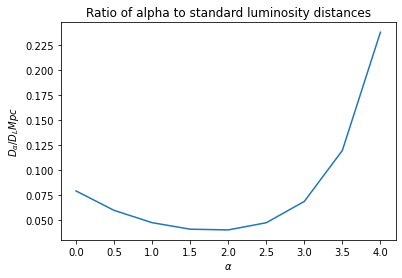

In [8]:
# follows luminosity distance implementation above, but includes alpha factor contribution
Hubble_param = 72
omega_m = .3
omega_lambda = .7

def func( z_prime, alpha ):
    return ((1 + z_prime)**(alpha-2)) / np.sqrt( z_prime ) # issue because math sqrt fctn converts array into scalar, use np.sqrt

def func2( z_prime ):
    return (omega_m * (1 + n * z_prime)**3 + omega_lambda)

def integrand( z_prime, alpha ):
    return func(func2( z_prime ), alpha)

n = np.array(range(0,50)) # controls number of points integrand is evaluated at

def alpha_dist( z, alpha ):
    z_prime = np.linspace(0,z).reshape(-1,1)
    integral = simps(integrand(z_prime, alpha), z_prime, axis=0)
    constant_term = (1 + z)**(1-alpha) / Hubble_param
    return constant_term * integral

# separate using *args

z = 4
results = []

alpha_values = np.arange(0, 4.5, .5) # alpha values end at 4, per GR tests paper specs
for a in alpha_values:
    alpha_lum_ratio = (alpha_dist(z, a) / lum_dist(z))[1]
    results.append(alpha_lum_ratio)

plt.plot(np.hstack(alpha_values), np.hstack(results))
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$D_{\alpha} / D_L {Mpc}$')
plt.title('Ratio of alpha to standard luminosity distances')

In [5]:
# z_prime

In [9]:
# calculate luminosity distances for redshifts 0 to 4
z = np.linspace(0,4)
camb_lum_dist = results.luminosity_distance(z)
camb_lum_dist = results.luminosity_distance(z)
camb_lum_dist

AttributeError: 'list' object has no attribute 'luminosity_distance'

In [ ]:
# z

In [ ]:
plt.plot(z, camb_lum_dist)
plt.xlabel('$z$')
plt.ylabel(r'$D_L /\rm{Mpc}$')
plt.title('Luminosity distance')
plt.ylim([0,40000])
plt.xlim([0,4]);

In [ ]:
len(lum_dist(4))

In [ ]:
len(camb_Dl)

In [ ]:
xhi_e = 1
t_emiss = 2
t_arriv = 15
a_t0 = 1
z = np.linspace(0,4)
a_t = a_t0 / (1 + z)

term_I = quad(a_t, t_emiss, t_arriv)